# **HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS**

# Group Members -
## 1. Akilesh Vishnu Mohan Raj
## 2. Kirthana Shri Chandra Sekar
## 3. Neeraj Rangwani
## 4. Samarth Saxena

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Importing libraries
import datetime as dt
import glob
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier as XG
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Getting all file pathnames in a list
path =  "/content/gdrive/MyDrive/DM/Project/*"
joined_list = glob.glob(path, recursive=True)
joined_list

['/content/gdrive/MyDrive/DM/Project/Test-1542969243754.csv',
 '/content/gdrive/MyDrive/DM/Project/Test_Inpatientdata-1542969243754.csv',
 '/content/gdrive/MyDrive/DM/Project/Test_Outpatientdata-1542969243754.csv',
 '/content/gdrive/MyDrive/DM/Project/Test_Beneficiarydata-1542969243754.csv',
 '/content/gdrive/MyDrive/DM/Project/Train-1542865627584.csv',
 '/content/gdrive/MyDrive/DM/Project/Train_Beneficiarydata-1542865627584.csv',
 '/content/gdrive/MyDrive/DM/Project/Train_Inpatientdata-1542865627584.csv',
 '/content/gdrive/MyDrive/DM/Project/Train_Outpatientdata-1542865627584.csv']

In [ ]:
#Converting all csv files to dataframe
train = pd.read_csv(joined_list[4])
train_beneficiary = pd.read_csv(joined_list[5])
train_outpatientdata = pd.read_csv(joined_list[6])
train_outpatientdata['type'] = 'Outpatient'
train_inpatientdata = pd.read_csv(joined_list[7])
train_inpatientdata['type'] = 'Inpatient'

## Final combined Dataframe

In [ ]:
#Merging all dataframes to single table
out_inpatient = pd.concat([train_outpatientdata,train_inpatientdata])
patient_data = pd.merge(out_inpatient, train_beneficiary, on='BeneID')
patient = pd.merge(patient_data, train, on='Provider')
patient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,27000,2136,450,160,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaN,...,2,1,1,2,2,0,0,890,120,No
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,NaN,...,1,1,2,1,2,0,0,4400,220,No
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,NaN,...,1,1,2,2,2,0,0,14240,2810,No
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,NaN,...,1,1,1,1,2,0,0,640,350,No


## DATA EXPLORATION & PREPROCESSING

In [ ]:
# Displaying information of the dataframe
display(patient.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

None

In [ ]:
# Data Statistics
display(patient.describe())

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,558211.000000,557312.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,558211.000000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,1.578838,1.255011,...,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745
std,3821.534891,274.016812,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,0.493746,0.717437,...,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,2.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000
75%,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,2.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,2.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [ ]:
#To understand data types of all column variables(whether feasible for operations)
print(patient.dtypes)

#To understand the null/missing values present in patient
patient.isnull().sum()

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
AdmissionDt                         object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DischargeDt                         object
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosi

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [ ]:
# % of missing values in each column of the dataframe
round((patient.isnull().sum()/patient.shape[0])*100, 1)

BeneID                               0.0
ClaimID                              0.0
ClaimStartDt                         0.0
ClaimEndDt                           0.0
Provider                             0.0
InscClaimAmtReimbursed               0.0
AttendingPhysician                   0.3
OperatingPhysician                  79.5
OtherPhysician                      64.2
AdmissionDt                         92.7
ClmAdmitDiagnosisCode               73.9
DeductibleAmtPaid                    0.2
DischargeDt                         92.7
DiagnosisGroupCode                  92.7
ClmDiagnosisCode_1                   1.9
ClmDiagnosisCode_2                  35.0
ClmDiagnosisCode_3                  56.5
ClmDiagnosisCode_4                  70.5
ClmDiagnosisCode_5                  79.9
ClmDiagnosisCode_6                  84.9
ClmDiagnosisCode_7                  88.1
ClmDiagnosisCode_8                  90.4
ClmDiagnosisCode_9                  92.5
ClmDiagnosisCode_10                 99.1
ClmProcedureCode

In [ ]:
# Dropping columns with missing values. Since data is from healthcare domain, it is not feasible to compute the missing values based on other row data values.
s = patient.isnull().sum()
patient.drop( s[(s*100/patient.shape[0])>0].index , axis = 1 , inplace = True)
patient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,type,DOB,Gender,Race,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,Outpatient,1943-01-01,1,1,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,Inpatient,1932-05-01,1,1,...,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,Outpatient,1913-12-01,2,1,...,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,Outpatient,1922-10-01,1,1,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,Outpatient,1930-07-01,2,1,...,1,1,1,1,2,27000,2136,450,160,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,Inpatient,1925-01-01,2,1,...,2,1,1,2,2,0,0,890,120,No
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,Inpatient,1927-05-01,1,2,...,1,1,2,1,2,0,0,4400,220,No
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,Inpatient,1946-06-01,2,1,...,1,1,2,2,2,0,0,14240,2810,No
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,Inpatient,1924-08-01,2,1,...,1,1,1,1,2,0,0,640,350,No


In [ ]:
# Adding a new column for Number of Claim Days based on Claim Start and End Date columns
from datetime import datetime
patient['#of_Claimdays'] = ((pd.to_datetime(patient['ClaimEndDt']) - pd.to_datetime(patient['ClaimStartDt']))/ np.timedelta64(1,'D')).astype('int32')

In [ ]:
#To check if dataframe has duplicate rows
patient.duplicated().any()

False

In [ ]:
# New shape of the dataframe
patient.shape

(558211, 32)

## DATA VISUALIZATION

## Trend of beneficiaries taking claim over the months

In [ ]:
viz5 = patient.copy()
# Creating new column 'month-year' from the Claim date column
viz5['claimed_date'] = pd.to_datetime(patient['ClaimStartDt'],format='%Y-%m')
viz5['month_year'] = viz5['claimed_date'].dt.strftime('%m-%Y')

# Getting count of claims based on month-year column
viz5_counts = viz5['month_year'].value_counts()
viz5_counts = pd.DataFrame({'month_year': viz5_counts.index, 'count': viz5_counts.values})
viz5_counts = viz5_counts.iloc[::-1]

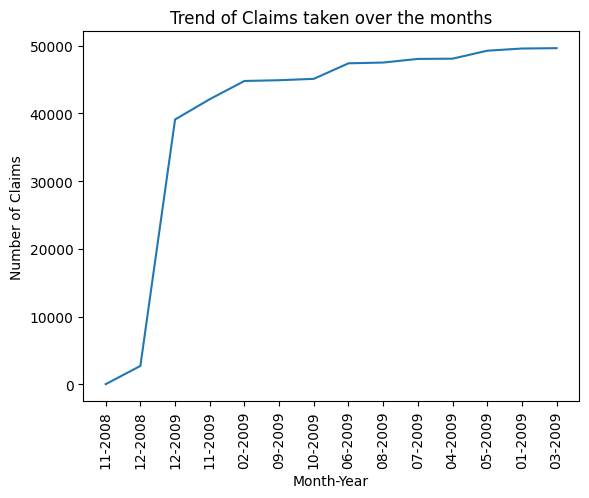

In [ ]:
# Creating a line plot using seaborn for month-year wise Number of Claims
sns.lineplot(x='month_year', y='count', data=viz5_counts)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Month-Year')
plt.ylabel('Number of Claims')
plt.title('Trend of Claims taken over the months')
plt.show()

### Trend of claims over the years has been drastically increasing which suggests that the fraudulent claims chances are directly proportional to the trend

## Distribution of Fraud and Non-Fraud Providers

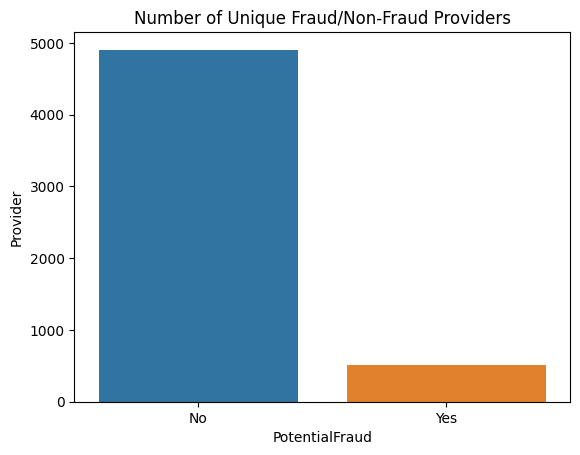

In [ ]:
# Distinct count of Providers grouped by PotentialFraud column
bar = patient.groupby('PotentialFraud')['Provider'].nunique().reset_index()

# Creating a bar plot using seaborn
sns.barplot(data = bar, x = 'PotentialFraud', y = 'Provider')
plt.title('Number of Unique Fraud/Non-Fraud Providers')
plt.show()

In [ ]:
# Adding a column to dataframe to see % distribution
bar['%Fraud'] = round((bar['Provider']/(bar['Provider'].sum()))*100,1)
bar

,PotentialFraud,Provider,%Fraud
0,No,4904,90.6
1,Yes,506,9.4


### In terms of Unique Providers, 90% are Not Fraud while the rest are Potential Frauds

In [ ]:
# Creating table based on claims to find Provider counts (not distinct)
bar2 = patient.groupby('PotentialFraud')['Provider'].count().reset_index()
bar2['%Fraud'] = round((bar2['Provider']/(bar2['Provider'].sum()))*100,1)
bar2

,PotentialFraud,Provider,%Fraud
0,No,345415,61.9
1,Yes,212796,38.1


### In terms of Beneficiaries, 62% of them have been serviced by a Non Fraud Provider while 38% have been possibly served by a Fraud Provider
### Thus, the ratio of customers is approximately 3:2 in terms of NotFraud to Fraud

## County-wise Number of Beneficiaries

In [ ]:
viz6 = patient.copy()
# Counts of Claims by each County
viz6_counts = viz6['County'].value_counts().head(30)
viz6_counts = pd.DataFrame({'County': viz6_counts.index, 'Count': viz6_counts.values})

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


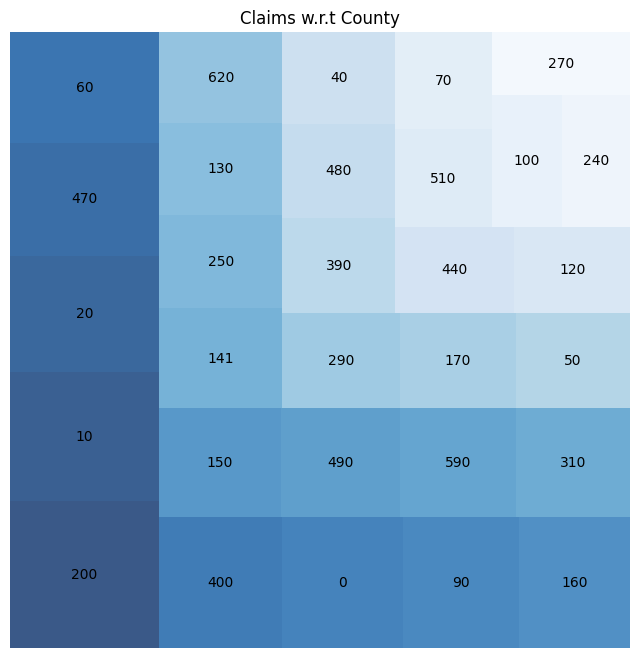

In [ ]:
import squarify
# Calculate the sizes of the rectangles in the treemap
sizes = viz6_counts['Count'].values
labels = viz6_counts['County'].values
color_palette = plt.cm.Blues_r
colors = [color_palette(i/float(len(labels))) for i in range(len(labels))]

# Create the treemap
plt.figure(figsize=(8, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

plt.title('Claims w.r.t County')
plt.axis('off')
plt.show()

### Graph shows County with maximum claims so that we can focus more on the top Counties and identify the Fraudalent CLaims based on Location

### Top 10 States with most Benefeciaries

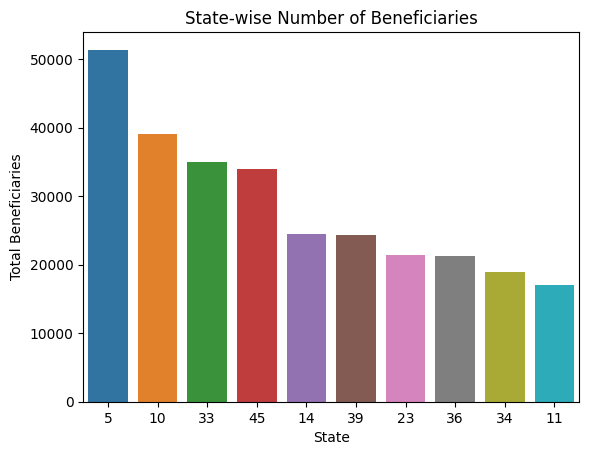

In [ ]:
# Grouping by State and getting count of Beneficiary IDs in descending order
bar3 = patient.groupby('State')['BeneID'].count().reset_index().sort_values(by='BeneID',ascending=False)

# Creating a bar plot using seaborn to show Top 10 states
sns.barplot(data = bar3.head(10), x = 'State', y = 'BeneID',order = bar3.head(10).sort_values(by='BeneID',ascending=False).State)
plt.title('State-wise Number of Beneficiaries')
plt.ylabel('Total Beneficiaries')
plt.show()

In [ ]:
# Adding a new column to see the percentage distribution
bar3['per'] = (bar3['BeneID']/bar3['BeneID'].sum())*100
bar3.head(10)

,State,BeneID,per
4,5,51350,9.199030
9,10,39073,6.999683
32,33,35024,6.274330
43,45,34022,6.094828
13,14,24417,4.374152
38,39,24251,4.344415
22,23,21343,3.823465
35,36,21291,3.814149
33,34,18905,3.386712
10,11,17003,3.045981


### Almost 50% of the total number of beneficiaries come from the Top 10 states

## Beneficiaries by Race

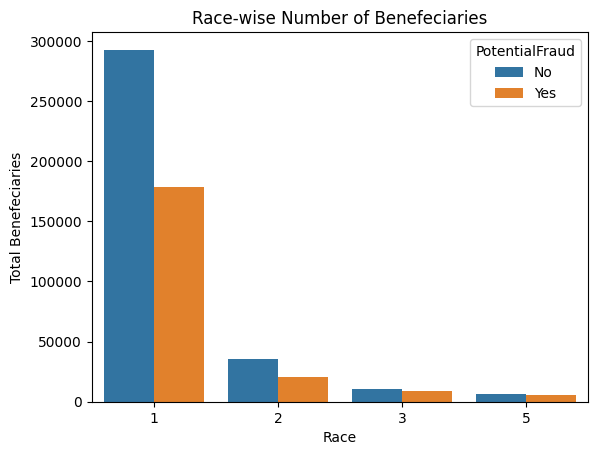

In [ ]:
# Grouping by Race and PotentialFraud columns and getting count of Beneficiary IDs in descending order
bar4 = patient.groupby(['Race','PotentialFraud'])['BeneID'].count().reset_index().sort_values(by='BeneID',ascending=False)

# Creating a grouped bar plot using seaborn with PotentialFraud as the group type
sns.barplot(data = bar4.head(10), x = 'Race', y = 'BeneID',hue = 'PotentialFraud')
plt.title('Race-wise Number of Benefeciaries')
plt.ylabel('Total Benefeciaries')
plt.show()

### Race 1 has the most number of benefeciaries, but also the highest difference in Fraud and Not Fraud providers. For other races, the differences is less implying not much variance between the providers

## LABEL ENCODING

In [ ]:
# Dropping extra columns which will not be used for ML model training
patient = patient.drop(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'DOB'], axis=1)

In [ ]:
# Cleaning RenalDiseaseIndicator column by replacing values and converting column to int type
patient['RenalDiseaseIndicator'] = patient['RenalDiseaseIndicator'].map({'Y': 1, '0': 0})

In [ ]:
# Converting object type columns to numeric using Label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# The 3 columns to process using Label Encoder
cols = ['type', 'Provider',  'PotentialFraud']
patient[cols] = patient[cols].apply(le.fit_transform)
patient

,Provider,InscClaimAmtReimbursed,type,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,PotentialFraud,#of_Claimdays
0,3928,26000,1,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,1,6
1,3928,50,0,1,1,0,39,310,12,12,...,2,1,2,2,2,24000,2136,450,1,0
2,3928,19000,1,2,1,0,39,230,12,12,...,2,1,2,2,2,19000,1068,100,1,12
3,3928,17000,1,1,1,0,39,600,12,12,...,2,1,1,2,2,17000,1068,1050,1,18
4,3928,13000,1,2,1,0,39,280,12,12,...,1,1,1,1,2,27000,2136,450,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2446,500,0,2,1,0,23,400,12,12,...,2,1,1,2,2,0,0,890,0,2
558207,2651,3300,0,1,2,0,25,150,12,12,...,1,1,2,1,2,0,0,4400,0,0
558208,457,2100,0,2,1,1,5,200,12,12,...,1,1,2,2,2,0,0,14240,0,20
558209,1671,10,0,2,1,0,16,490,12,12,...,1,1,1,1,2,0,0,640,0,0


## Correlation Heatmap

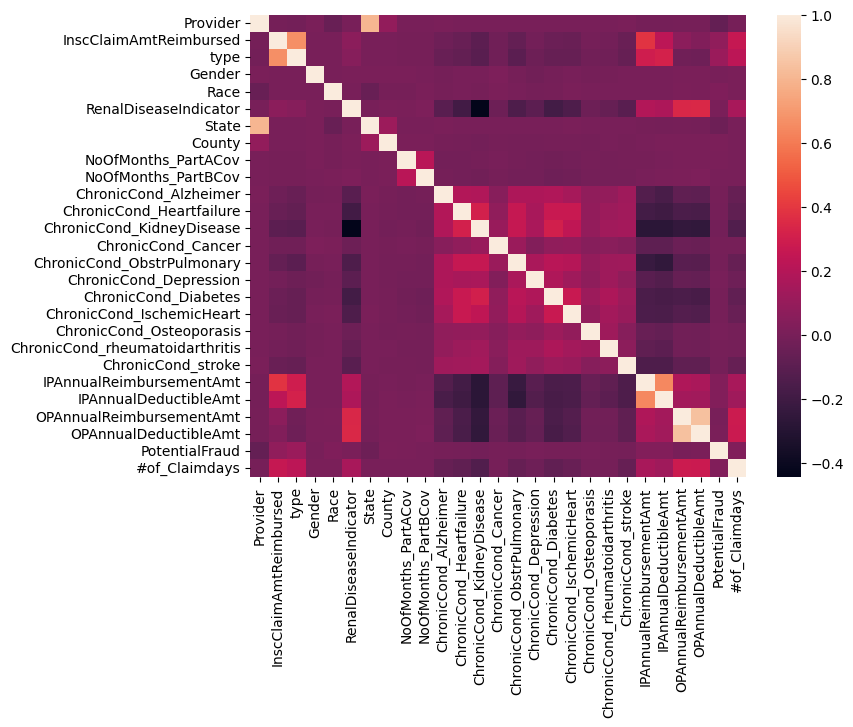

In [ ]:
fig = plt.figure(figsize=(8,6))

# Heatmap of correlation between all columns in the dataframe
sns.heatmap(patient.corr())
plt.show()

### Most columns do not have a high correlation with each other, but it is observed that very few columns do. So we can remove those with high correlation (above 0.8)

In [ ]:
# The columns with value 1 between each other implies those have high correlation. Diagonal 1 values are to be ignored since those are between same columns
print((patient.corr() > 0.8).to_markdown())

|                                 |   Provider |   InscClaimAmtReimbursed |   type |   Gender |   Race |   RenalDiseaseIndicator |   State |   County |   NoOfMonths_PartACov |   NoOfMonths_PartBCov |   ChronicCond_Alzheimer |   ChronicCond_Heartfailure |   ChronicCond_KidneyDisease |   ChronicCond_Cancer |   ChronicCond_ObstrPulmonary |   ChronicCond_Depression |   ChronicCond_Diabetes |   ChronicCond_IschemicHeart |   ChronicCond_Osteoporasis |   ChronicCond_rheumatoidarthritis |   ChronicCond_stroke |   IPAnnualReimbursementAmt |   IPAnnualDeductibleAmt |   OPAnnualReimbursementAmt |   OPAnnualDeductibleAmt |   PotentialFraud |   #of_Claimdays |
|:--------------------------------|-----------:|-------------------------:|-------:|---------:|-------:|------------------------:|--------:|---------:|----------------------:|----------------------:|------------------------:|---------------------------:|----------------------------:|---------------------:|-----------------------------:|------

### From the above output, it is seen that OPAnnualReimbursementAmt and OPAnnualDeductibleAmt have high correlation between each other (above 0.8). So we can drop one of them

In [ ]:
# Dropping the correlated column
patient = patient.drop(['OPAnnualDeductibleAmt'], axis=1)
patient.head()

,Provider,InscClaimAmtReimbursed,type,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,PotentialFraud,#of_Claimdays
0,3928,26000,1,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,1,6
1,3928,50,0,1,1,0,39,310,12,12,...,2,1,2,2,2,24000,2136,450,1,0
2,3928,19000,1,2,1,0,39,230,12,12,...,2,1,2,2,2,19000,1068,100,1,12
3,3928,17000,1,1,1,0,39,600,12,12,...,2,1,1,2,2,17000,1068,1050,1,18
4,3928,13000,1,2,1,0,39,280,12,12,...,1,1,1,1,2,27000,2136,450,1,4


## VARIABLE SCALING

### There are 4 numerical columns with very high range of values that need to be scaled (reduced) to be consistent with other column values

In [ ]:
columns_to_scale = ['InscClaimAmtReimbursed','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt']

# Creating a new DataFrame with the scaled data
df_scaled = pd.DataFrame(StandardScaler().fit_transform(patient[columns_to_scale]), columns=columns_to_scale)

# Merging the dataframe back with the original and dropping extra columns
patient_scaled = pd.concat([df_scaled, patient.drop(columns_to_scale, axis=1)], axis=1)
patient_scaled.head()

,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,Provider,type,Gender,Race,RenalDiseaseIndicator,State,...,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PotentialFraud,#of_Claimdays
0,6.542662,2.610838,2.234826,-0.571436,3928,1,1,1,0,39,...,2,2,1,1,1,2,1,1,1,6
1,-0.247810,1.592704,1.329105,-0.470968,3928,0,1,1,0,39,...,2,2,2,2,1,2,2,2,1,0
2,4.710935,1.168481,0.423385,-0.561132,3928,1,2,1,0,39,...,2,1,2,2,1,2,2,2,1,12
3,4.187585,0.998792,0.423385,-0.316403,3928,1,1,1,0,39,...,2,2,2,2,1,1,2,2,1,18
4,3.140884,1.847237,1.329105,-0.470968,3928,1,2,1,0,39,...,2,1,2,1,1,1,1,2,1,4


# Applying dataframe to Machine Learning Models
## Using Classification Models (Logistic Regression, Decision Tree Classifier, Random Forest and XG Boost Classifier) to predict Potential Fraud for a Provider

## Splitting scaled patient dataframe into train and test (80:20 ratio)

In [ ]:
# Using train_test split function to split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(patient_scaled.drop(['PotentialFraud'],axis=1), patient_scaled['PotentialFraud'], test_size = 0.2, random_state = 13)

In [ ]:
# Checking number of rows and columns of the train and test dataframes
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(446568, 25) (446568,)
(111643, 25) (111643,)


In [ ]:
# Creating empty lists to store evaluation metric values (Accuracy, F1 score, Precision and Recall)
accuracy = []
f1score = []
precision = []
recall = []

## Logistic Regression

In [ ]:
# Fitting train data into Logistic model
log_classifier = LogisticRegression().fit(X_train, Y_train)
# Predicting values for test data
y_pred_log = log_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluation metric values for Logistic model
accuracy.append(round(accuracy_score(Y_test,y_pred_log),2))
f1score.append(round(f1_score(Y_test,y_pred_log),2))
precision.append(round(precision_score(Y_test,y_pred_log),2))
recall.append(round(recall_score(Y_test,y_pred_log),2))

print("LOGISTIC REGRESSION: ")
print("Accuracy Score - ",accuracy_score(Y_test,y_pred_log))
print("F1 score - ",f1_score(Y_test,y_pred_log))
print("Precision Score - ",precision_score(Y_test,y_pred_log))
print("Recall score - ",recall_score(Y_test,y_pred_log))

LOGISTIC REGRESSION: 
Accuracy Score -  0.6217228128946732
F1 score -  0.06121904592539902
Precision Score -  0.5822410147991544
Recall score -  0.03230801717463223


## Decision Tree Classifier

In [ ]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dmba import plotDecisionTree

no display found. Using non-interactive Agg backend


In [ ]:
# Fitting train data into Decision Tree Classifier model
decision_classifier = DecisionTreeClassifier(random_state=123, max_depth=8, min_samples_split=20, min_samples_leaf=20)
decision_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=20,
                       random_state=123)

In [ ]:
# Predicting values for test data
y_pred_dec = decision_classifier.predict(X_test)

In [ ]:
# Evaluation metric values for Decision Tree model
accuracy.append(round(accuracy_score(Y_test,y_pred_dec),2))
f1score.append(round(f1_score(Y_test,y_pred_dec),2))
precision.append(round(precision_score(Y_test,y_pred_dec),2))
recall.append(round(recall_score(Y_test,y_pred_dec),2))

print("DECISION TREE: ")
print("Accuracy Score - ",accuracy_score(Y_test,y_pred_dec))
print("F1 score - ",f1_score(Y_test,y_pred_dec))
print("Precision Score - ",precision_score(Y_test,y_pred_dec))
print("Recall score - ",recall_score(Y_test,y_pred_dec))

DECISION TREE: 
Accuracy Score -  0.7629497595012674
F1 score -  0.6510922730089255
Precision Score -  0.7430935901294011
Recall score -  0.5793622861969452


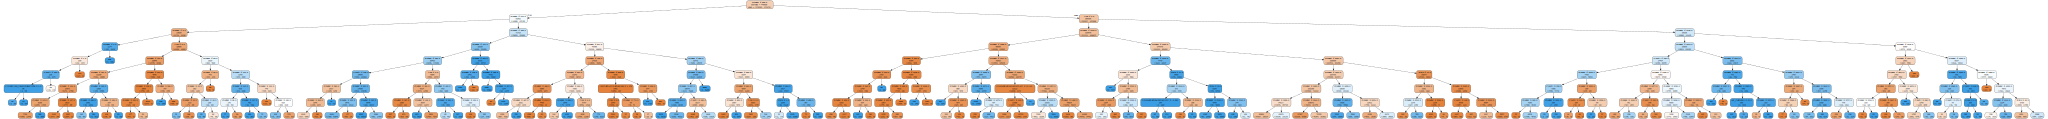

In [ ]:
# Plotting the decision tree model based on features
plotDecisionTree(decision_classifier,feature_names=X_train.columns)

## Random Forest

In [ ]:
# Fitting train data into Random Forest model
rforest_classifier = RandomForestClassifier()
rforest_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
# Predicting values for test data
y_pred_rf = rforest_classifier.predict(X_test)

In [ ]:
# Evaluation metric values for Random Forest model
accuracy.append(round(accuracy_score(Y_test,y_pred_rf),2))
f1score.append(round(f1_score(Y_test,y_pred_rf),2))
precision.append(round(precision_score(Y_test,y_pred_rf),2))
recall.append(round(recall_score(Y_test,y_pred_rf),2))

print("RANDOM FOREST: ")
print("Accuracy Score - ",accuracy_score(Y_test,y_pred_rf))
print("F1 score - ",f1_score(Y_test,y_pred_rf))
print("Precision Score - ",precision_score(Y_test,y_pred_rf))
print("Recall score - ",recall_score(Y_test,y_pred_rf))

RANDOM FOREST: 
Accuracy Score -  0.8953181121969134
F1 score -  0.8568067927025007
Precision Score -  0.8966304236331931
Recall score -  0.8203702400225241


## XG Boost Classifier

In [ ]:
# Fitting train data into XG Boost Classifier model
xg_classifier = XG()
xg_classifier.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
# Predicting values for test data
y_pred_xg = xg_classifier.predict(X_test)

In [ ]:
# Evaluation metric values for XG Boost model
accuracy.append(round(accuracy_score(Y_test,y_pred_xg),2))
f1score.append(round(f1_score(Y_test,y_pred_xg),2))
precision.append(round(precision_score(Y_test,y_pred_xg),2))
recall.append(round(recall_score(Y_test,y_pred_xg),2))

print("XG BOOST: ")
print("Accuracy Score - ",accuracy_score(Y_test,y_pred_xg))
print("F1 score - ",f1_score(Y_test,y_pred_xg))
print("Precision Score - ",precision_score(Y_test,y_pred_xg))
print("Recall score - ",recall_score(Y_test,y_pred_xg))

XG BOOST: 
Accuracy Score -  0.7878774307390521
F1 score -  0.672030799911367
Precision Score -  0.8200561057221076
Recall score -  0.5692733628962249


In [ ]:
# Creating a dictionary to store all evaluation metrics for each model together
final_metrics = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XG Boost'], 'Accuracy': accuracy, 'F1 score': f1score, 'Precision': precision, 'Recall': recall}

In [ ]:
# Displaying Final dataframe comparing all Models
Final_df = pd.DataFrame(final_metrics)
Final_df

,Model,Accuracy,F1 score,Precision,Recall
0,Logistic Regression,0.62,0.06,0.58,0.03
1,Decision Tree,0.76,0.65,0.74,0.58
2,Random Forest,0.90,0.86,0.90,0.82
3,XG Boost,0.79,0.67,0.82,0.57


## **Final Insights**

## Random Forest performs the best for all the 4 evaluation metrics achieving 90% accuracy. It has the highest accuracy and F1 score, indicating better overall performance and also has the highest precision and recall values, which means it has the best balance between correctly identifying fraudulent healthcare providers and minimizing false positives. The Decision Tree and XG Boost models also perform reasonably well, but are outperformed by the Random Forest model. The logistic regression model has the lowest accuracy, F1 score, precision and recall values, indicating poor performance for this task.